# Problem Statement

Dataset collected here:
https://collegescorecard.ed.gov/data/

For simplicity the MERGED2014_15_PP.csv file was used for this analysis.

The president of your undergraduate alma mater has been hearing trends that new students are more sensitive to the cost of tuition, so he/she wants to understand what might happen if they reduce the price. Use the data scource above to perform the following steps:

1. Generate unsupervised clusters of universities. Describe the features of each cluser-especially the features of the cluster to which your alma mater belongs.
2. Use your alma mater's cluster to create a model to evaluate the relationship between average cost and enrollment. Use number of Title IV students (combine NUM4_PUB and NUM4_PRIV) as the dependent variable and as many independent variable as you deem necessary. However, you must include at least one of the following as an independent variable:
    - a. Net Tuition revenue per full-time equivalent student (TUITFTE)
    - b. Average Net Price for Title IV institutions (merge both public and private fields, NPT4_PUB and NPT4_PRIV respectively). 
3. Suppose that other tests have been done that confirm a causal relationship between cost and enrollment. Using the model you created in step 2, evaluate the effect on enrollment of your alma mater if it were to do a one-time price decrease of 7%.
    - a. Could this increase, decrease or have no effect on the total Net Tuition revenue of the school?
    - b. If this decreases the total tuition revenue, then what other variables could be changed to offset this loss?
4. When possible, make smart assumptions. Perhaps filtering outliers that have low retention or are geographically isolated. Exclude any establishments that don't have Title IV students.

## Outputs
Provide the following:
- A Jupyter notebook that can run your classifier and regression locally. Assume that the user has only downloaded the CollegeScorecard_Raw_data.zip and CollegeScorecardDataDictionary.xlsx files and has done no pre-processing.
    - You may do your analysis on one or more years of data. If you choose one year, please use MERGED2014_15_PP.csv
- Add commenting to describe what and why each step of code
- Describe what libraries were used and why they were chosen
- Provide a summary of the results in a way that a non-statistician could understand.


# Summary of Findings:

After running an unsupervised machine learning algorithm, it was found that there were a total of 13 groups or "clusters" that universities would be grouped into based on commonalities or similarities. Additional insights about my alma mater's group can be found below. <br> <br>

To be able to estimate the enrollment number of title iv students, another machine learning algorithm was used to find relationships with enrollment and other factors (cost at university, admission rate, etc). It was found that a 1-time 7% decrease in average net price would enrollment of title-iv students doubled. This in turn decreased the net tuition revenue per full-time student. To offset this, the university could admit more non-pell grant reciepants decreasing the total percentage of pell-grant recipients at the university. The university could also decrease the number of pell grant recipients at the university. See below for more details of this analysis. 

## Useful libraries

In [1]:
# Used to handle dataframes and matrix manipulation
import numpy as np
import pandas as pd
# Used for plotting 
import matplotlib.pyplot as plt
from sklearn import preprocessing
# Used for plotting in Jupyter Notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Filename of data source

In [2]:
filename = "MERGED2014_15_PP.csv"


### Load Data
Due to large number of features on file, features were selected/loaded based on what I believed to be important. I defined important as what I believed to affect enrollment (geography, financial related factors, federal aid, etc). 

In [3]:
def load_data(file_name):
    """ Given a csv file name containing bird data, generate a data frame.
    
        Args:
            (filename) : csv file name.
        Return: 
            (dataframe) n-by-m (n is number of examples, m is features) : dataframe of features and labes for each example
            
        """
    
    main_fields = ["INSTNM","CITY",
                   "STABBR","CONTROL",
                   "REGION","UGDS",
                   "TUITFTE", 'NPT4_PUB' ,
                   'NPT4_PRIV',"NUM4_PUB",
                   "NUM4_PRIV","TUITIONFEE_IN",
                   "TUITIONFEE_OUT","PCTPELL","ADM_RATE"]
    extra_fields = ["COMP_ORIG_YR4_RT","COMP_4YR_TRANS_YR4_RT",
                    "FEMALE_COMP_ORIG_YR4_RT","MALE_COMP_ORIG_YR4_RT"]
    more_fields = ["PELL_COMP_ORIG_YR4_RT","PELL_COMP_4YR_TRANS_YR4_RT",
                   "LOAN_COMP_ORIG_YR4_RT","LOAN_COMP_4YR_TRANS_YR4_RT"]
    even_more_fields =["FIRSTGEN_COMP_ORIG_YR4_RT","FIRSTGEN_COMP_4YR_TRANS_YR4_RT"]
    
    fields = main_fields+extra_fields+more_fields+even_more_fields
    
    df_data = pd.read_csv(file_name, skipinitialspace=True, usecols=fields,encoding='utf-8')
        
    return df_data

df_data = load_data(filename)
df_data.head()

,INSTNM,CITY,STABBR,CONTROL,REGION,ADM_RATE,UGDS,NPT4_PUB,NPT4_PRIV,NUM4_PUB,...,COMP_ORIG_YR4_RT,COMP_4YR_TRANS_YR4_RT,FEMALE_COMP_ORIG_YR4_RT,MALE_COMP_ORIG_YR4_RT,PELL_COMP_ORIG_YR4_RT,PELL_COMP_4YR_TRANS_YR4_RT,LOAN_COMP_ORIG_YR4_RT,LOAN_COMP_4YR_TRANS_YR4_RT,FIRSTGEN_COMP_ORIG_YR4_RT,FIRSTGEN_COMP_4YR_TRANS_YR4_RT
0,Alabama A & M University,Normal,AL,1,5,0.5256,4206.0,15229.0,NaN,680.0,...,0.207801951,0.027756939,0.253256151,0.158878505,0.194275802,PrivacySuppressed,0.202362205,PrivacySuppressed,0.187719298,0.019298246
1,University of Alabama at Birmingham,Birmingham,AL,1,5,0.8569,11383.0,14789.0,NaN,906.0,...,0.462527553,0.036737693,0.493215339,0.41187926,0.431338028,0.029342723,0.46221865,PrivacySuppressed,0.42913001,0.034213099
2,Amridge University,Montgomery,AL,2,5,NaN,291.0,NaN,12992.0,NaN,...,0.186046512,PrivacySuppressed,0.12244898,0.27027027,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.222222222,PrivacySuppressed
3,University of Alabama in Huntsville,Huntsville,AL,1,5,0.8203,5451.0,18596.0,NaN,301.0,...,0.416089965,0.044982699,0.448275862,0.380255942,0.392950392,0.041775457,0.418269231,PrivacySuppressed,0.368556701,0.048969072
4,Alabama State University,Montgomery,AL,1,5,0.5326,4811.0,11110.0,NaN,778.0,...,0.195774648,0.026760563,0.246851385,0.130990415,0.185614849,PrivacySuppressed,0.192337165,PrivacySuppressed,0.178187404,0.01843318


#### Function used to fill NaNs in column with average of column

In [4]:
def fillna(df,col):
    """ Given a dataframe and column name, fill in holes (values with NaN) of data with average of the column.
    
        Args:
            (dataframe) : n-by-m dataframe.
            (column name) : string value.
        Return: 
            (dataframe) n-by-m (n is number of examples, m is features) : new dataframe.
    """
    df[col] =pd.to_numeric(df_data[col], errors='coerce')

    avg = float(df[col].mean())
    df[col] = df[col].fillna(avg)
    return df[col]

## Generate Features

In [5]:
def gen_features(df):
    """ Given a dataframe, do feature engineering.
    
        Args:
            (dataframe) : n-by-m dataframe.
        Return: 
            (dataframe) n-by-m (n is number of examples, m is features) : new dataframe.
    """
    
    ## replace 'PrivacySuppressed' string with NaNs in dataframe.
    df = df.replace('PrivacySuppressed', np.nan)
    
    ## Fill in holes with mode for CONTROL column (CONTROL is if university is public, private, etc.)
    ctr_deg_mode = float(df['CONTROL'].mode())
    df['CONTROL']= df['CONTROL'].fillna(ctr_deg_mode)
    
    ## Replace variables with string equivalent (recieved from dictionary file).
    df['CONTROL']= df['CONTROL'].replace([1,2,3],["Public","Private nonprofit","Private for-profit"])
    
    ## Make a 1-Hot encoding dataframe since control is a discrete feature.
    df_control = pd.get_dummies(df['CONTROL'])
    
    ## String equivalent for the REGION column was received from dictionary file.
    locations = ['U.S. Service Schools',
    'New England (CT, ME, MA, NH, RI, VT)',
    'Mid East (DE, DC, MD, NJ, NY, PA)',
    'Great Lakes (IL, IN, MI, OH, WI)',
    'Plains (IA, KS, MN, MO, NE, ND, SD)',
    'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
    'Southwest (AZ, NM, OK, TX)',
    'Rocky Mountains (CO, ID, MT, UT, WY)',
    'Far West (AK, CA, HI, NV, OR, WA)',
    'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)']
    
    ## Replace REGION values with string equivalent.
    df['REGION']= df['REGION'].replace(list(range(0,10)),locations)
    
    ## Make a 1-Hot encoded dataframe since region is a discreate feature
    df_region = pd.get_dummies(df['REGION'])
    
    ## Specify continuous features
    continuous_cols = ['UGDS',"TUITFTE",'NPT4_PRIV','TUITIONFEE_IN',
     'TUITIONFEE_OUT', 'PCTPELL', 'ADM_RATE', 'COMP_ORIG_YR4_RT', 
     'COMP_4YR_TRANS_YR4_RT', 'FEMALE_COMP_ORIG_YR4_RT', 'MALE_COMP_ORIG_YR4_RT', 
     'PELL_COMP_ORIG_YR4_RT', 'PELL_COMP_4YR_TRANS_YR4_RT', 'LOAN_COMP_ORIG_YR4_RT', 
     'LOAN_COMP_4YR_TRANS_YR4_RT', 'FIRSTGEN_COMP_ORIG_YR4_RT', 'FIRSTGEN_COMP_4YR_TRANS_YR4_RT']
    
    ## Create a dataframe and fill in holes of the continuous dataframe using the fillna function created earlier.
    X = pd.DataFrame()
    for i in continuous_cols:
        X[i] = fillna(df,i)
    
    ## Concatenate 1-hot encoded dataframes with the continuous values dataframe.
    X = pd.concat([df_control,df_region,X],axis=1)
    
    X['NPT4_PUB'] = df['NPT4_PUB'].fillna(0.0)
    X['NPT4_PRIV'] = df['NPT4_PRIV'].fillna(0.0)
    X['NUM4_PUB'] = df['NUM4_PUB'].fillna(0.0)
    X['NUM4_PRIV'] = df['NUM4_PRIV'].fillna(0.0)
    
    ## Create 1 total cost feature combining public and private universities' average Net Price for Title IV institutions 
    pub_cost = X['NPT4_PUB'] 
    priv_cost = X['NPT4_PRIV']
    total_cost = (pub_cost + priv_cost)
    X['TOTAL_COST'] = total_cost
    
    ## Create 1 enrollment feature combining public and private number of title iv student features
    pub_iv = X['NUM4_PUB']
    priv_iv = X['NUM4_PRIV']
    
    total_iv = pub_iv + priv_iv
    X['TOTAL_NUM_IV'] = total_iv
    
    
    ## drop the extra columns that were consolidated earlier
    X = X.drop(['NPT4_PUB', 'NPT4_PRIV'],axis=1)
    X = X.drop(['NUM4_PUB', 'NUM4_PRIV'],axis=1)


    return X
    

In [6]:
## Generate features in variable X
X = gen_features(df_data)
print(np.shape(X))
print(X.columns)

## Get index of universities that have title iv students 
new_idx = np.logical_and((X['TOTAL_COST'] != 0),(X['TOTAL_NUM_IV'] != 0))
print(np.shape(new_idx))

## Create new dataframe that only includes institutions that have title iv students
new_X = X[new_idx]
new_X.head()

(7703, 31)
Index(['Private for-profit', 'Private nonprofit', 'Public',
       'Far West (AK, CA, HI, NV, OR, WA)', 'Great Lakes (IL, IN, MI, OH, WI)',
       'Mid East (DE, DC, MD, NJ, NY, PA)',
       'New England (CT, ME, MA, NH, RI, VT)',
       'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)',
       'Plains (IA, KS, MN, MO, NE, ND, SD)',
       'Rocky Mountains (CO, ID, MT, UT, WY)',
       'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
       'Southwest (AZ, NM, OK, TX)', 'U.S. Service Schools', 'UGDS', 'TUITFTE',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCTPELL', 'ADM_RATE',
       'COMP_ORIG_YR4_RT', 'COMP_4YR_TRANS_YR4_RT', 'FEMALE_COMP_ORIG_YR4_RT',
       'MALE_COMP_ORIG_YR4_RT', 'PELL_COMP_ORIG_YR4_RT',
       'PELL_COMP_4YR_TRANS_YR4_RT', 'LOAN_COMP_ORIG_YR4_RT',
       'LOAN_COMP_4YR_TRANS_YR4_RT', 'FIRSTGEN_COMP_ORIG_YR4_RT',
       'FIRSTGEN_COMP_4YR_TRANS_YR4_RT', 'TOTAL_COST', 'TOTAL_NUM_IV'],
      dtype='object')
(7703,)


,Private for-profit,Private nonprofit,Public,"Far West (AK, CA, HI, NV, OR, WA)","Great Lakes (IL, IN, MI, OH, WI)","Mid East (DE, DC, MD, NJ, NY, PA)","New England (CT, ME, MA, NH, RI, VT)","Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","Plains (IA, KS, MN, MO, NE, ND, SD)","Rocky Mountains (CO, ID, MT, UT, WY)",...,FEMALE_COMP_ORIG_YR4_RT,MALE_COMP_ORIG_YR4_RT,PELL_COMP_ORIG_YR4_RT,PELL_COMP_4YR_TRANS_YR4_RT,LOAN_COMP_ORIG_YR4_RT,LOAN_COMP_4YR_TRANS_YR4_RT,FIRSTGEN_COMP_ORIG_YR4_RT,FIRSTGEN_COMP_4YR_TRANS_YR4_RT,TOTAL_COST,TOTAL_NUM_IV
0,0,0,1,0,0,0,0,0,0,0,...,0.253256,0.158879,0.194276,0.036575,0.202362,0.031253,0.187719,0.019298,33449.254053,680.0
1,0,0,1,0,0,0,0,0,0,0,...,0.493215,0.411879,0.431338,0.029343,0.462219,0.031253,0.429130,0.034213,33009.254053,906.0
2,0,1,0,0,0,0,0,0,0,0,...,0.122449,0.270270,0.407410,0.036575,0.407365,0.031253,0.222222,0.035089,12992.000000,3.0
3,0,0,1,0,0,0,0,0,0,0,...,0.448276,0.380256,0.392950,0.041775,0.418269,0.031253,0.368557,0.048969,36816.254053,301.0
4,0,0,1,0,0,0,0,0,0,0,...,0.246851,0.130990,0.185615,0.036575,0.192337,0.031253,0.178187,0.018433,29330.254053,778.0


### Generating K-Clusters Using Kmeans & Selecting $k$

A common strategy for chooseing k is to just to plot the loss versus the number of clusters and try to find a point that is "good enough" in terms of loss versus the number of cluster (i.e., where adding additional clusters doesn't help much).

In [7]:
def kmeans(X, k, max_iter=20, rand_seed=0):
    """ Given a dataframe and k number of clusers, run kmeans.
    
        Args:
            (dataframe) : n-by-m dataframe.
            (column name) : string value.
        Return: 
            (numpy.array) k-by-m (k is number of clusters, m are the features) : mean of each clusters found.
            (numpy.array) n-by-1 (n is number of examples) : cluster assignment aligned with each university.
            (numpy.float) loss of kmeans optimization.
    """
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

### Plot to determine how many clusters, k, should be used for unsupervised algorithm.

Text(0.5, 1.0, 'Loss vs $K$')

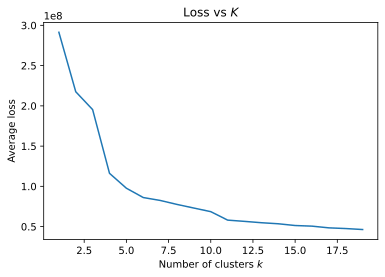

In [8]:
losses = [kmeans(new_X.values,k,max_iter=10,rand_seed=0)[2] for k in range(1,20)]
plt.plot(range(1,20), losses)
plt.xlabel("Number of clusters $k$")
plt.ylabel("Average loss")
plt.title("Loss vs $K$")

In this case, it seems reasonable to choose 13 clusters, as the loss decreases quite rapidly to that point, and only decreases slowly after that. I'll emphasize that it is almost never possible to determine the "true" number of clusters but this is good for this analysis.

In [9]:
Mu, y, loss = kmeans(new_X.values,13,max_iter=10,rand_seed=0)

In [10]:
print(np.shape(Mu))
print(np.shape(y))
print(np.shape(new_X))

(13, 31)
(6606,)
(6606, 31)


## Function to find which cluster your alma mater belongs to

In [11]:
def almamater_cluster(almamater,df,mu,y,X):
    """ Given name of alma mater, a dataframe,mean of cluster, cluster assignments, and dataframe of processed dataframe,
        return index of alma mater, cluster, and cluster number.
    
        Args:
            (almamater) : string value
            (df) : n-by-m dataframe.
            (mu) : k-by-m mean of each clusters found
            (y) : 1-by-m dataframe
            (X) : j-by-m dataframe
        Return: 
            (numpy.array) k-by-m (k is number of clusters, m are the features) : mean of each clusters found.
            (numpy.array) n-by-1 (n is number of examples) : cluster assignment aligned with each university.
            (numpy.float) loss of kmeans optimization.
    """
    ## find index of alma mater in original data frame
    idx = df.index[df['INSTNM'] == almamater].tolist()[0]
    
    ## find cluster to which alma mater belongs to
    cluster = y[idx]
    
    print("Your alma mater belongs to cluster:",cluster)
    
    ## cluster features to which alma mater belongs to
    my_cluster = pd.DataFrame(mu[cluster]).T
    
    my_cluster.columns = X.columns
    
    return idx,my_cluster,cluster



## Alma mater cluster

In [12]:
idx_in_df,cluster_mean,cluster_number = almamater_cluster("Carnegie Mellon University",df_data,Mu,y,new_X)
for i in cluster_mean.columns:
    print(cluster_mean[i].head())

Your alma mater belongs to cluster: 11
0    0.003623
Name: Private for-profit, dtype: float64
0    0.0
Name: Private nonprofit, dtype: float64
0    0.996377
Name: Public, dtype: float64
0    0.094203
Name: Far West (AK, CA, HI, NV, OR, WA), dtype: float64
0    0.155797
Name: Great Lakes (IL, IN, MI, OH, WI), dtype: float64
0    0.184783
Name: Mid East (DE, DC, MD, NJ, NY, PA), dtype: float64
0    0.09058
Name: New England (CT, ME, MA, NH, RI, VT), dtype: float64
0    0.0
Name: Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI), dtype: float64
0    0.07971
Name: Plains (IA, KS, MN, MO, NE, ND, SD), dtype: float64
0    0.065217
Name: Rocky Mountains (CO, ID, MT, UT, WY), dtype: float64
0    0.26087
Name: Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV), dtype: float64
0    0.068841
Name: Southwest (AZ, NM, OK, TX), dtype: float64
0    0.0
Name: U.S. Service Schools, dtype: float64
0    8016.811594
Name: UGDS, dtype: float64
0    6936.347826
Name: TUITFTE, dtype: float64
0    8163.

## Feature Insights of Cluster (alma mater's)
The cluster that my alma mater, Carnegie Mellon University, belongs to has a feature that is strongly related to public institutions (99.64% of schools in this cluster). ~18% cluster of schools in this cluster are populated near the Mid East (DE, DC, MD, NJ, NY, PA) region. The average total number of Title_IV students is 848 and the average cost is ~$32,131 in this cluster. 

On average, there are 38.81% of students within this cluster that are Pell-grant recipients and 40% of these Pell-grant recipients completed their degree in 4 years at their original institution. Additional insights can be seen above.

## Q2.
Use your alma mater's cluster to create a model to evaluate the relationship between average cost and enrollment. Use number of Title IV students (combine NUM4_PUB and NUM4_PRIV) as the dependent variable and as many independent variable as you deem necessary. However, you must include at least one of the following as an independent variable:
    - a. Net Tuition revenue per full-time equivalent student (TUITFTE)
    - b. Average Net Price for Title IV institutions (merge both public and private fields, NPT4_PUB and NPT4_PRIV respectively). 

Text(0.5, 1.0, 'Outliers included')

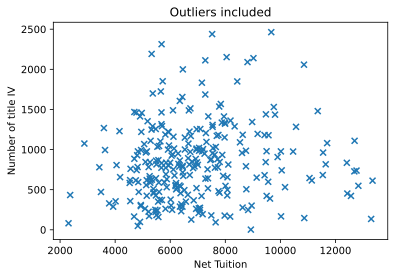

In [13]:
## Get numpy.array for the number of title iv students for universities in my alma mater's cluser
title_iv= new_X[y==cluster_number]['TOTAL_NUM_IV'].values

## Get numpy.array for the net tuition revenue for universities in my alma mater's cluser
net_tuition = new_X[y==cluster_number]['TUITFTE'].values

## Plot Number of title IV vs Net Tuition for visualization
plt.scatter(net_tuition,title_iv,marker='x')
plt.ylabel("Number of title IV")
plt.xlabel("Net Tuition")
plt.title("Outliers included")



As seen above, just with these two variables, there does not seem to be too much correlation.

# Lets seperate the dependent and independent vars now

In [14]:
## Get a dataframe that includes universities in my alma mater's cluster and all features included
data_set = new_X[y==cluster_number]

## Drop the TOTAL_NUM_IV column as this will be used as the dependent variable for ML algorithm later
data_set = data_set.drop(['TOTAL_NUM_IV'],axis=1)
data_set.columns

Index(['Private for-profit', 'Private nonprofit', 'Public',
       'Far West (AK, CA, HI, NV, OR, WA)', 'Great Lakes (IL, IN, MI, OH, WI)',
       'Mid East (DE, DC, MD, NJ, NY, PA)',
       'New England (CT, ME, MA, NH, RI, VT)',
       'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)',
       'Plains (IA, KS, MN, MO, NE, ND, SD)',
       'Rocky Mountains (CO, ID, MT, UT, WY)',
       'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
       'Southwest (AZ, NM, OK, TX)', 'U.S. Service Schools', 'UGDS', 'TUITFTE',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCTPELL', 'ADM_RATE',
       'COMP_ORIG_YR4_RT', 'COMP_4YR_TRANS_YR4_RT', 'FEMALE_COMP_ORIG_YR4_RT',
       'MALE_COMP_ORIG_YR4_RT', 'PELL_COMP_ORIG_YR4_RT',
       'PELL_COMP_4YR_TRANS_YR4_RT', 'LOAN_COMP_ORIG_YR4_RT',
       'LOAN_COMP_4YR_TRANS_YR4_RT', 'FIRSTGEN_COMP_ORIG_YR4_RT',
       'FIRSTGEN_COMP_4YR_TRANS_YR4_RT', 'TOTAL_COST'],
      dtype='object')

## Dealing with outliers

Remove outlier data outside of 3 standard deviations for both number of title_iv students and Net Tuition revenue

In [15]:
## Removing outliers in net tuition 
net_tuit_idx_without_outliers = [np.abs(net_tuition-net_tuition.mean()) <= (3*net_tuition.std())]

## Removing outliers in number of title iv students 
title_iv_without_outliers = [np.abs(title_iv-title_iv.mean()) <= (3*title_iv.std())]

## Combining these net_tuit_idx_without_outliers and title_iv_without_outliers

## True indicates valid indices and therefore these indices should be used to exclude outliers
use_idx = np.logical_and(net_tuit_idx_without_outliers, title_iv_without_outliers)

## Post-outlier

Let's plot again to visualize if correlation improves and try to fit a line through the data.

Text(0.5, 0, 'Net Tuition')

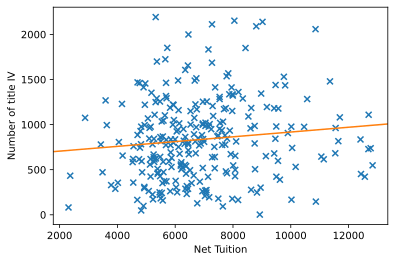

In [16]:
theta = np.polyfit(net_tuition[use_idx[0]],title_iv[use_idx[0]], deg=1)
plt.scatter(net_tuition[use_idx[0]],title_iv[use_idx[0]], marker='x')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.ylabel("Number of title IV")
plt.xlabel("Net Tuition")

Yup, doesn't look right. <br>
Okay, let's try to visualize the distribution of some of the data (number of title IV students). <br>
Lets look at the shape of the histograms for the enrollment of title_iv students since we are interested in predicting this value. 

## Visualization of Distribution

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         3.,  1.,  6.,  8., 17., 12., 28., 37., 53., 56., 35., 13.]),
 array([0.30103   , 0.42262242, 0.54421484, 0.66580726, 0.78739968,
        0.90899211, 1.03058453, 1.15217695, 1.27376937, 1.3953618 ,
        1.51695422, 1.63854664, 1.76013906, 1.88173148, 2.00332391,
        2.12491633, 2.24650875, 2.36810117, 2.48969359, 2.61128602,
        2.73287844, 2.85447086, 2.97606328, 3.09765571, 3.21924813,
        3.34084055]),
 <BarContainer object of 25 artists>)

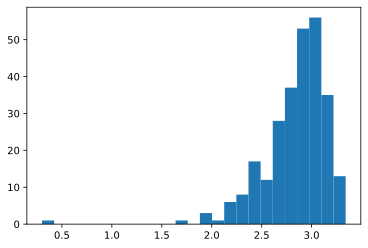

In [17]:
plt.hist(np.log10(title_iv[use_idx[0]]), bins=25)

There is some skewness so maybe we need to transform this data to "look" more normal. <br>
We can do a logit transformation if our data is between 0 and 1.

## Min-Max transformation
To get our data to be between zero and one we are going to apply a min-max normalization of the data. We will take advantage of the sklearn.preprocessing library to do a min-max transfer.

In [18]:
from sklearn.preprocessing import MinMaxScaler

## variable used to get title_iv with outliers excluded
D = title_iv[use_idx[0]]

## this function is used to create a min-max object that scales data between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

## we will fit the data to the object and transform it so the data is now between 0 and 1.
data_scaled = min_max_scaler.fit_transform(D[:,np.newaxis])

## This is just to test if we can transform our data between 0 and 1 and inverse-transform it back, this looks good.
print(D[0])
print(data_scaled[0])
print(min_max_scaler.inverse_transform(data_scaled)[0])

680.0
[0.30958904]
[680.]


The scipy.stats libray will be used to compare the normality of the data before and after logit transformation.

In [19]:
import scipy.stats as stats

In [20]:
## we need to reshape the array to be able to input it into the q-q plot.
data_scaled = np.reshape(data_scaled,len(data_scaled))

## Q–Q plot

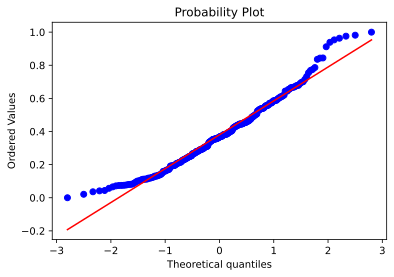

In [21]:
_=stats.probplot(data_scaled,plot=plt)
plt.show()

A q-q plot look at quantiles of data and plot them on x-axis and plot the actual observed quantiles on the y axis.
If this data was normal, should lie exactly on a line. Because the data isnt normal(we have a shorter tail aka skewed data), there is some separation of the two curves. <br>
<br>
We will take a logit transform to try to make the data more normal since we have data (normalized) between zero and one now.

We will utilize the scipy.special library to take advantage of the logit function and the expit function to transform the data.

In [22]:
from scipy.special import logit, expit

## Logit Transformation

In [23]:
logit_title_iv = logit(data_scaled)
print(logit_title_iv)

[-8.02041269e-01 -3.52462544e-01 -1.84441750e+00 -6.00025326e-01
 -1.42089989e+00 -5.94042906e-01  1.99748271e-01  1.59239749e-01
 -7.76528789e-01 -1.39774924e+00 -1.88685671e-01  7.05501490e-01
 -4.01880564e-02 -3.92164513e-01  6.80843539e-01 -4.20153121e-02
 -3.13835681e+00 -2.20061885e-01 -1.79475652e-01            -inf
 -1.66299226e+00 -6.74710332e-01 -2.00896522e+00  7.47064869e-01
  1.53726682e-01 -9.42650342e-01 -2.44358850e+00 -4.68668218e-01
 -7.97772132e-01 -2.05284101e-01 -1.18194202e+00 -1.83669260e+00
 -2.44127658e-01 -4.74457980e-01 -5.58360295e-01 -9.93001491e-01
 -8.10600455e-01 -1.30005803e+00 -1.10226860e+00 -8.19187901e-01
 -1.21269956e+00  2.92478245e-01  1.23610809e+00 -2.25964734e+00
 -9.83761192e-01 -3.08248320e+00 -2.31160862e-01 -6.08018157e-01
 -5.30845824e-01 -2.00023661e+00 -2.19216128e+00 -1.68433607e-01
  3.27241659e+00 -1.12434900e+00  1.68358753e+00  4.43666850e-01
  1.31696866e-01  9.13248356e-03  2.19186857e-02  1.69051775e+00
 -1.81377378e+00 -9.49450

Lets not include indices that have an inf value in them.

In [24]:
new_logit_title_iv = logit_title_iv[~np.isinf(logit_title_iv)]
new_net_tuition = net_tuition[use_idx[0]][~np.isinf(logit_title_iv)]



## Distribution post logit transform

(array([ 1.,  1.,  2.,  2.,  9., 13., 13., 18., 23., 31., 44., 38., 23.,
        21., 15.,  3.,  3.,  3.,  0.,  1.,  1.,  1.,  1.,  0.,  2.]),
 array([-3.84178713, -3.52874189, -3.21569666, -2.90265143, -2.5896062 ,
        -2.27656097, -1.96351574, -1.6504705 , -1.33742527, -1.02438004,
        -0.71133481, -0.39828958, -0.08524435,  0.22780089,  0.54084612,
         0.85389135,  1.16693658,  1.47998181,  1.79302705,  2.10607228,
         2.41911751,  2.73216274,  3.04520797,  3.3582532 ,  3.67129844,
         3.98434367]),
 <BarContainer object of 25 artists>)

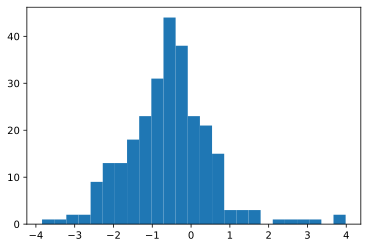

In [25]:
plt.hist(new_logit_title_iv, bins=25)

This distribution looks more normal, not perfect but better. Let's take a look at the q-q plot now.

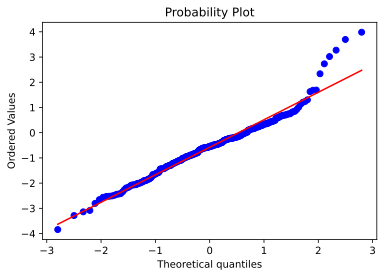

In [26]:
_ = stats.probplot(new_logit_title_iv,plot=plt)
plt.show()

This new q-q plot looks better than before which the exception of the tail-end of the curve.<br>
Instead of trying to predict the enrollment, we can try to predict the new_logit_enrollment instead as it is more normal.

Lets add more independent features and update the indices used for the machine learning portion.

In [27]:
new_data_set = data_set[use_idx[0]][~np.isinf(logit_title_iv)]
new_data_set.columns

Index(['Private for-profit', 'Private nonprofit', 'Public',
       'Far West (AK, CA, HI, NV, OR, WA)', 'Great Lakes (IL, IN, MI, OH, WI)',
       'Mid East (DE, DC, MD, NJ, NY, PA)',
       'New England (CT, ME, MA, NH, RI, VT)',
       'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)',
       'Plains (IA, KS, MN, MO, NE, ND, SD)',
       'Rocky Mountains (CO, ID, MT, UT, WY)',
       'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
       'Southwest (AZ, NM, OK, TX)', 'U.S. Service Schools', 'UGDS', 'TUITFTE',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCTPELL', 'ADM_RATE',
       'COMP_ORIG_YR4_RT', 'COMP_4YR_TRANS_YR4_RT', 'FEMALE_COMP_ORIG_YR4_RT',
       'MALE_COMP_ORIG_YR4_RT', 'PELL_COMP_ORIG_YR4_RT',
       'PELL_COMP_4YR_TRANS_YR4_RT', 'LOAN_COMP_ORIG_YR4_RT',
       'LOAN_COMP_4YR_TRANS_YR4_RT', 'FIRSTGEN_COMP_ORIG_YR4_RT',
       'FIRSTGEN_COMP_4YR_TRANS_YR4_RT', 'TOTAL_COST'],
      dtype='object')

## Splitting training set, cross validation set, and testing set
We will be using the sklearn.model_selection library to randomly partition the data for training and testing.

In [28]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(new_data_set, new_logit_title_iv, test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

Lets check out the size of the splits.

In [29]:
print(np.shape(X_train))
print(np.shape(X_cv))
print(np.shape(X_test))

(131, 30)
(57, 30)
(81, 30)


# Machine Learning
To build the model, we will be using various sklearn packages such as GradientBoostingRegressor, Support Vector Machine Regressor, and Linear Regressor.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

Comparing training MSE with a baseline MSE (just select the mean everytime in training set).

In [31]:
print("Training MSE: ", np.mean((clf.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))

Training MSE:  0.01434095434288805
Baseline training MSE:  1.2554209167738104


Comparing cross-validation MSE with a baseline MSE (just select the mean everytime in training set).

In [32]:
print("CV MSE: ", np.mean((clf.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

CV MSE:  0.49708712099144664
Baseline CV MSE:  0.8990828305905263


Comparing test MSE with a baseline MSE (just select the mean everytime in training set).

Lets examine model performance if we add more samples.

Text(0.5, 0, 'Number of samples')

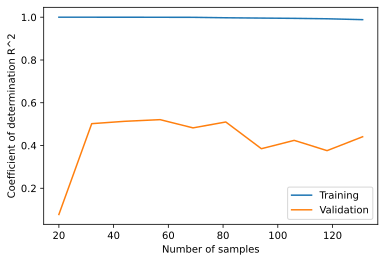

In [33]:
def get_err_samples(clf, X, y, X_cv, y_cv, n_samples):
    clf.fit(X[:n_samples], y[:n_samples])
    return np.array([clf.score(X[:n_samples], y[:n_samples]), clf.score(X_cv, y_cv)])

n_samples = [int(x) for x in np.linspace(20, X_train.shape[0], 10)]
errors = np.array([get_err_samples(clf, X_train, y_train, X_cv, y_cv, n) for n in n_samples])
plt.plot(n_samples, errors[:,0], n_samples, errors[:,1])
plt.legend(["Training", "Validation"])
plt.ylabel("Coefficient of determination R^2")
plt.xlabel("Number of samples")

Doesnt seem like adding more examples to our gradient boosting model will increase model performance.

## Investigating additional models

In [34]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
print("Training MSE: ", np.mean((lm.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))

Training MSE:  0.3603096009004491
Baseline training MSE:  1.2554209167738104


In [37]:
print("CV MSE: ", np.mean((lm.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

CV MSE:  0.3579638387248209
Baseline CV MSE:  0.8990828305905263


In [38]:
print("Test MSE: ", np.mean((lm.predict(X_test) - y_test)**2))
print("Baseline Test MSE: ", np.mean((np.mean(y_train) - y_test)**2))

Test MSE:  0.5466374826358704
Baseline Test MSE:  1.380811508111907


In [39]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1,max_iter=10)
svr_lin = SVR(kernel='linear', C=1e3,max_iter=10)
svr_poly = SVR(kernel='poly', C=1e3, degree=2,max_iter=10)
y_rbf = svr_rbf.fit(X_train, y_train)
y_lin = svr_lin.fit(X_train, y_train)
y_poly = svr_poly.fit(X_train, y_train)

/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [40]:
print("Training MSE rbf: ", np.mean((y_rbf.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))


print("Training MSE lsvm: ", np.mean((y_lin.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))


print("Training MSE psvm: ", np.mean((y_poly.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))


print("CV MSE: ", np.mean((y_rbf.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

print("CV MSE: ", np.mean((y_lin.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

print("CV MSE: ", np.mean((y_poly.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

Training MSE rbf:  0.47633069632929287
Baseline training MSE:  1.2554209167738104
Training MSE lsvm:  1.7318299754870146
Baseline training MSE:  1.2554209167738104
Training MSE psvm:  9.595565850413283
Baseline training MSE:  1.2554209167738104
CV MSE:  0.970795402076956
Baseline CV MSE:  0.8990828305905263
CV MSE:  1.4460406495296259
Baseline CV MSE:  0.8990828305905263
CV MSE:  9.413313022336784
Baseline CV MSE:  0.8990828305905263


# Q3.
Suppose that other tests have been done that confirm a causal relationship between cost and enrollment. Using the model you created in step 2, evaluate the effect on enrollment of your alma mater if it were to do a one-time price decrease of 7%.
    - a. Could this increase, decrease or have no effect on the total Net Tuition revenue of the school?
    - b. If this decreases the total tuition revenue, then what other variables could be changed to offset this loss?

Lets try to predict the Total Number of Title IV Students if the total cost decreased by 7%.

In [41]:
## Find the data frame of your alma mater using the index variable from before.
dummy = X.iloc[idx_in_df]

## Lets update the cost column to a 7% decrease 
dummy['TOTAL_COST'] = dummy['TOTAL_COST']*0.93

## Enrollment before discount
base_enrollment = dummy['TOTAL_NUM_IV']

## Lets also remove the TOTAL_NUM_IV column since this is what we are aiming to predict.
dummy = dummy.drop(['TOTAL_NUM_IV'])
print("base enrollment:",base_enrollment,"\n")
print(dummy)

base enrollment: 578.0 

Private for-profit                                                0.000000
Private nonprofit                                                 1.000000
Public                                                            0.000000
Far West (AK, CA, HI, NV, OR, WA)                                 0.000000
Great Lakes (IL, IN, MI, OH, WI)                                  0.000000
Mid East (DE, DC, MD, NJ, NY, PA)                                 1.000000
New England (CT, ME, MA, NH, RI, VT)                              0.000000
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                   0.000000
Plains (IA, KS, MN, MO, NE, ND, SD)                               0.000000
Rocky Mountains (CO, ID, MT, UT, WY)                              0.000000
Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)        0.000000
Southwest (AZ, NM, OK, TX)                                        0.000000
U.S. Service Schools                                              0.000000


/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Before we make a prediction, lets make sure our scaler and transformation functions are working as we expect.

In [42]:
print(base_enrollment)
print(min_max_scaler.inverse_transform(expit(logit(min_max_scaler.transform(base_enrollment.reshape(1,-1))))))

578.0
[[578.]]


Okay, that looks good.

Lets use our gradient boosting model from above to predict the logit of the number of title iv students.

In [43]:
est = clf.predict(dummy.values.reshape(1, -1))

Lets now transform our data to get the prediction for enrollment of title iv students.

In [44]:
check_est= expit(est)
our_prediction = min_max_scaler.inverse_transform(check_est[0].reshape(1,-1))
print("The predicted enrollment for title iv students is found to be {0:3f} for the gradient boosting model".format(our_prediction[0][0]))


The predicted enrollment for title iv students is found to be 541.186281 for the gradient boosting model


Lets now make a prediction with a 7% decrease using the linear model.

In [45]:
lm_est = lm.predict(dummy.values.reshape(1, -1))

lm_num_tit_iv_pred = expit(lm_est)

lm_check_ex= expit(lm_num_tit_iv_pred.reshape(1,-1))

lm_prediction = min_max_scaler.inverse_transform(lm_check_ex[0].reshape(1,-1))[0][0]
print("The predicted enrollment for title iv students is found to be {0:3f} for the linear model".format(lm_prediction))


The predicted enrollment for title iv students is found to be 1201.981507 for the linear model


Lets now make a prediction with a 7% decrease using the Epsilon-Support Vector model with a radial basis kernal function.

In [46]:
y_rbf_est = y_rbf.predict(dummy.values.reshape(1, -1))

y_rbf_num_tit_iv_pred = expit(y_rbf_est)

y_rbf_check_ex= expit(y_rbf_num_tit_iv_pred)
y_rbf_prediction = min_max_scaler.inverse_transform(y_rbf_check_ex[0].reshape(1,-1))[0][0]
print("The predicted enrollment for title iv students is found to be {0:3f} for the svm (rbf kernal) model".format(y_rbf_prediction))


The predicted enrollment for title iv students is found to be 1317.008799 for the svm (rbf kernal) model


Lets now make a prediction with a 7% decrease using the Epsilon-Support Vector model with a linear kernal function.

In [47]:
y_lin_est = y_lin.predict(dummy.values.reshape(1, -1))

y_lin_num_tit_iv_pred = expit(y_lin_est)

y_lin_check_ex= expit(y_lin_num_tit_iv_pred)
y_lin_prediction = min_max_scaler.inverse_transform(y_lin_check_ex[0].reshape(1,-1))[0][0]

print("The predicted enrollment for title iv students is found to be {0:3f} for the svm (linear kernal) model".format(y_lin_prediction))


The predicted enrollment for title iv students is found to be 1602.676723 for the svm (linear kernal) model


Lets now make a prediction with a 7% decrease using the Epsilon-Support Vector model with a polynomial kernal function.

In [48]:
y_poly_est = y_poly.predict(dummy.values.reshape(1, -1))

y_poly_num_tit_iv_pred = expit(y_poly_est)

y_poly_check_ex= expit(y_poly_num_tit_iv_pred)
y_poly_prediction = min_max_scaler.inverse_transform(y_poly_check_ex[0].reshape(1,-1))[0][0]

print("The predicted enrollment for title iv students is found to be {0:3f} for the svm (poly kernal) model".format(y_poly_prediction))


The predicted enrollment for title iv students is found to be 1603.018287 for the svm (poly kernal) model


## Quick Summary:
Although many models were used, it should be noted that the linear regression model provided the best cross validation error and best testing error, therefore, this model's enrollment prediction should be used.

# Q3 (Cont.)
- a. Could this increase, decrease or have no effect on the total Net Tuition revenue of the school?
    - b. If this decreases the total tuition revenue, then what other variables could be changed to offset this loss?

The seaborn library will be used for mor visualizations and to compare correlation of features.

/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/Users/gusjenkins/.pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


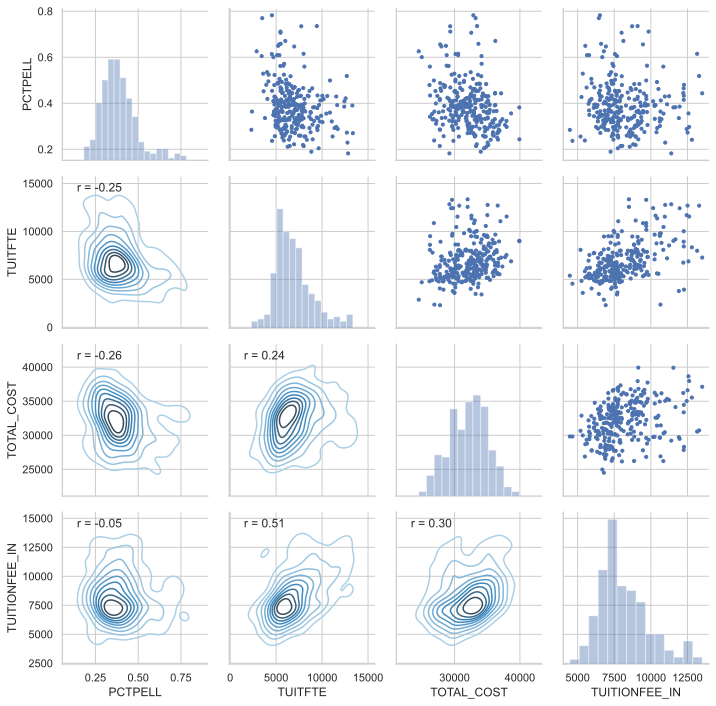

In [49]:
import seaborn as sns

sns.set(style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

cols=['PCTPELL','TUITFTE','TOTAL_COST','TUITIONFEE_IN']
samples = data_set#.sample(n=100)


sns.set(style='whitegrid',context='notebook')
g = sns.PairGrid(pd.DataFrame(samples[cols]), palette=["red"],size=2.5)
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)

The figure above suggests that the total net revenue (TUITFTE) and the price/total cost (TOTAL_COST) are directly proportional with a correlation coeffecient of 0.24. Hence, with a price decrease of 7%, we could expect that the total net revenue would also decrease. The total net revenue (TUITFTE) and percentage of pell grant recipients are inversely proportional with a correlation coeffecient of -0.25. Hence, to offset the decrease in total net revenue, we could admit more students who aren't pell grant recipient.

# Conclusion
After running the kmeans unsupervised machine learning algorithm, it was found that there were 13 different clusters in the data. Using just the universities in my alma mater's cluster, different regressor models were used to train a model to predict enrollment of title iv students. It was found that with a 7% decrease in cost, enrollemnt of title iv students would double. This in turn would decreasethe total net revenue per student. To offset this, the univserity could admit more non-pell grant recipients.